<a href="https://colab.research.google.com/github/Twixii99/Machine-Learning---DataTalks/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-20 14:47:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.2’

AB_NYC_2019.csv.2   100%[===================>]   6.75M  --.-KB/s    in 0.03s   

2021-09-20 14:47:57 (204 MB/s) - ‘AB_NYC_2019.csv.2’ saved [7077973/7077973]



In [67]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [68]:
n = len(df)

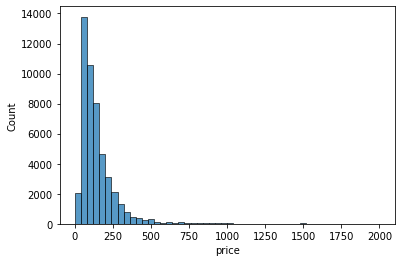

In [69]:
sns.histplot(df.price[df.price < 2000], bins=50)
# after plotting the price column then the plot has long tail distribution, after maybe 600.

In [70]:
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']
target = df.price

# Question 1

In [71]:
features_no_nans = df[features].isnull().sum()
features_with_a_missing_value = features_no_nans[features_no_nans > 0]
print("The feature with missing values is {} and the number of NANs is {}".format(features_with_a_missing_value.index.to_list(), features_with_a_missing_value.values))

The feature with missing values is ['reviews_per_month'] and the number of NANs is [10052]


In [72]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Question 2

In [73]:
np.median(df.minimum_nights)

3.0

In [74]:
idx = np.arange(n)

In [75]:
np.random.seed(42)
np.random.shuffle(idx)

In [76]:
n_validate = int(n * 0.2)
n_test = int(n * 0.2)
n_train =  n - n_validate - n_test
assert(n_train + n_validate + n_test == n)

In [77]:
df_train = df.iloc[:n_train]
df_validate = df.iloc[n_train:n_train + n_validate]
df_test = df.iloc[n_train + n_validate:]

In [78]:
y_train = np.log1p(df_train.price.values)
y_validate = np.log1p(df_validate.price.values)
y_test = np.log1p(df_test.price.values)

In [79]:
del df_train['price']
del df_validate['price']
del df_test['price']

# Question 3 (shared function between zero fill and mean fill

```
# This is formatted as code
```

)

In [80]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [81]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [82]:
def prepare_X(df):
    df_num = df[features]
    X = df_num.values
    return X

### Filling NANs with zeros

In [94]:
df_train_zero = df_train.fillna(0)
df_train_zero.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [95]:
X_train_zero = prepare_X(df_train_zero)
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

In [102]:
df_validate_zero = df_validate.fillna(0)
X_validate_zero = prepare_X(df_validate_zero)
y_pred_Zero = w0_zero + X_validate_zero.dot(w_zero)
rmse(y_pred_Zero, y_validate).round(2)

0.66

### Filling NANs with mean

In [103]:
mean = np.mean(df_train.reviews_per_month)
df_train_mean = df_train.fillna(mean)
df_train_mean.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [104]:
X_train_mean = prepare_X(df_train_mean)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [105]:
df_validate_mean = df_validate.fillna(mean)
X_validate_mean = prepare_X(df_validate_mean)
y_pred_mean = w0_mean + X_validate_mean.dot(w_mean)
rmse(y_pred_mean, y_validate).round(2)

0.67

# Question 4

In [100]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [101]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [109]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w_0 + X_validate_zero.dot(w)
    print('%6s' %r, rmse(y_validate, y_pred))

 1e-06 0.6643720183415781
0.0001 0.6640847616778823
 0.001 0.6625228986991942
  0.01 0.6699349384439067
   0.1 0.6897512096278247
     1 0.6942148292284005
     5 0.694585803979226
    10 0.6945702378934429
